In [64]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sklearn
from scipy.stats import skew, kurtosis, entropy
from scipy.fft import fft
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [65]:
dir_path = r'C:\Users\Admin\Desktop\DS203\E7\MFCC-files-v2'
dir_files = os.listdir(dir_path)
print((dir_files))

ls_files = []

for file_name in dir_files:
    file_path = os.path.join(dir_path, file_name)
    mfcc_arr = genfromtxt(file_path, delimiter=',')
    ls_files.append(mfcc_arr)
    
print(len(ls_files))

['01-MFCC.csv', '02-MFCC.csv', '03-MFCC.csv', '04-MFCC.csv', '05-MFCC.csv', '06-MFCC.csv', '07-MFCC.csv', '08-MFCC.csv', '09-MFCC.csv', '10-MFCC.csv', '100-MFCC.csv', '101-MFCC.csv', '102-MFCC.csv', '103-MFCC.csv', '104-MFCC.csv', '105-MFCC.csv', '106-MFCC.csv', '107-MFCC.csv', '108-MFCC.csv', '109-MFCC.csv', '11-MFCC.csv', '110-MFCC.csv', '111-MFCC.csv', '112-MFCC.csv', '113-MFCC.csv', '114-MFCC.csv', '115-MFCC.csv', '116-MFCC.csv', '12-MFCC.csv', '13-MFCC.csv', '14-MFCC.csv', '15-MFCC.csv', '16-MFCC.csv', '17-MFCC.csv', '18-MFCC.csv', '19-MFCC.csv', '20-MFCC.csv', '21-MFCC.csv', '22-MFCC.csv', '23-MFCC.csv', '24-MFCC.csv', '25-MFCC.csv', '26-MFCC.csv', '27-MFCC.csv', '28-MFCC.csv', '29-MFCC.csv', '30-MFCC.csv', '31-MFCC.csv', '32-MFCC.csv', '33-MFCC.csv', '34-MFCC.csv', '35-MFCC.csv', '36-MFCC.csv', '37-MFCC.csv', '38-MFCC.csv', '39-MFCC.csv', '40-MFCC.csv', '41-MFCC.csv', '42-MFCC.csv', '43-MFCC.csv', '44-MFCC.csv', '45-MFCC.csv', '46-MFCC.csv', '47-MFCC.csv', '48-MFCC.csv', '49-MFC

In [66]:
new_ls_files = []
for i in range(len(ls_files)):
    lx = ls_files[i][0].shape[0]
    q = lx//100
    new_ls_file = ls_files[i][:, :q*100]
    new_ls_files.append(new_ls_file)
    
print(len(new_ls_files)) 

116


In [67]:
dir_path_scrapped = r'C:\Users\Admin\Desktop\DS203\E7\scrapped'
dir_files_scrapped = os.listdir(dir_path_scrapped)
print((dir_files_scrapped))

ls_files_scrapped = []

for file_name in dir_files_scrapped:
    file_path = os.path.join(dir_path_scrapped, file_name)
    mfcc_arr = genfromtxt(file_path, delimiter=',')
    ls_files_scrapped.append(mfcc_arr)
    
print(len(ls_files_scrapped))

['1audio.csv', '2audio.csv', '3audio.csv', '4audio.csv', '5audio.csv', '6audio.csv', '7audio.csv', '8audio.csv', '90audio.csv', '91audio.csv', '92audio.csv', '93audio.csv']
12


In [68]:
new_ls_files_scrapped = []
for i in range(len(ls_files_scrapped)):
    lx = ls_files[i][0].shape[0]
    q = lx//100
    new_ls_file = ls_files[i][:, :q*100]
    new_ls_files_scrapped.append(new_ls_file)
    
print(len(new_ls_files_scrapped)) 

12


In [69]:
def calculateMeans(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_mean_elements = []
    for i in range(100):
        mean = np.mean(array[:, q*i:q*(i+1)], axis=1)
        ls_mean_elements.append(mean)
        
    ls_mean_elements = np.array(ls_mean_elements)
    ls_mean_elements = ls_mean_elements.reshape(20, -1)
    return ls_mean_elements


def calculateVariance(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_var_elements = []
    for i in range(100):
        var = np.var(array[:, q*i:q*(i+1)], axis=1)
        ls_var_elements.append(var)
    
    ls_var_elements = np.array(ls_var_elements)
    ls_var_elements = ls_var_elements.reshape(20, -1)
    return ls_var_elements

def calculateMinMax(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_min_elements = []
    ls_max_elements = []
    for i in range(100):
        min = np.min(array[:, q*i:q*(i+1)], axis=1)
        max = np.max(array[:, q*i:q*(i+1)], axis=1)
        ls_min_elements.append(min)
        ls_max_elements.append(max)
    
    ls_min_elements = np.array(ls_min_elements)
    ls_min_elements = ls_min_elements.reshape(20, -1)
    
    ls_max_elements = np.array(ls_max_elements)
    ls_max_elements = ls_max_elements.reshape(20, -1)
    return ls_min_elements, ls_max_elements

def calculateMedian(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_median_elements = []
    for i in range(100):
        val = np.median(array[:, q*i:q*(i+1)], axis=1)
        ls_median_elements.append(val)
    
    ls_median_elements = np.array(ls_median_elements)
    ls_median_elements = ls_median_elements.reshape(20, -1)
    return ls_median_elements

def calculateSumPTP(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_sum_elements = []
    ls_ptp_elements = []
    for i in range(100):
        sum = np.sum(array[:, q*i:q*(i+1)], axis=1)
        ptp = np.ptp(array[:, q*i:q*(i+1)], axis=1)
        ls_sum_elements.append(sum)
        ls_ptp_elements.append(ptp)
    
    ls_sum_elements = np.array(ls_sum_elements)
    ls_sum_elements = ls_sum_elements.reshape(20, -1)
    
    ls_ptp_elements = np.array(ls_ptp_elements)
    ls_ptp_elements = ls_ptp_elements.reshape(20, -1)
    return ls_sum_elements, ls_ptp_elements

def calculateSkewKurtosis(array):
    array = np.array(array)
    q = array[0].shape[0]//100
    ls_skew_elements = []
    ls_kurtosis_elements = []
    for i in range(100):
        skew_val = skew(array[:, q*i:q*(i+1)], axis=1)
        kurtosis_val = kurtosis(array[:, q*i:q*(i+1)], axis=1)
        ls_skew_elements.append(skew_val)
        ls_kurtosis_elements.append(kurtosis_val)
    
    ls_skew_elements = np.array(ls_skew_elements)
    ls_skew_elements = ls_skew_elements.reshape(20, -1)
    
    ls_kurtosis_elements = np.array(ls_kurtosis_elements)
    ls_kurtosis_elements = ls_kurtosis_elements.reshape(20, -1)
    return ls_skew_elements, ls_kurtosis_elements

In [70]:
def calculateStatistics(array):
    mean = calculateMeans(array)
    var = calculateVariance(array)
    min, max = calculateMinMax(array)
    median = calculateMedian(array)
    sum, ptp = calculateSumPTP(array)
    # skew_val, kurtosis_val = calculateSkewKurtosis(array)
    
    features = np.concatenate((mean, var, min, max, median, sum, ptp), axis=1) 
    return features

In [71]:
features_list = []
for i in range(len(new_ls_files)):
    features = calculateStatistics(new_ls_files[i])
    features_list.append(features)
    
features_list_scrapped = []
for i in range(len(new_ls_files_scrapped)):
    features = calculateStatistics(new_ls_files_scrapped[i])
    features_list_scrapped.append(features)

print(len(features_list), len(features_list_scrapped))    

116 12


In [72]:
def calculateSpectralEnergy(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_spectral_energy_elements = []
    for i in range(5):
        spectral_energy = np.sum(np.abs(array[:, q*i:q*(i+1)])**2, axis=1)
        ls_spectral_energy_elements.append(spectral_energy)
        
    ls_spectral_energy_elements = np.array(ls_spectral_energy_elements)
    ls_spectral_energy_elements = ls_spectral_energy_elements.reshape(20, -1)
    return ls_spectral_energy_elements

def calculateDominantFrequency(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_dominant_frequency_elements = []
    for i in range(5):
        dominant_frequency = np.argmax(np.abs(fft(array[:, q*i:q*(i+1)], axis=1)), axis=1)
        ls_dominant_frequency_elements.append(dominant_frequency)
        
    ls_dominant_frequency_elements = np.array(ls_dominant_frequency_elements)
    ls_dominant_frequency_elements = ls_dominant_frequency_elements.reshape(20, -1)
    return ls_dominant_frequency_elements

def calculatePercentile(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_percentile_25_elements = []
    ls_percentile_75_elements = []
    for i in range(5):
        percentile_25 = np.percentile(array[:, q*i:q*(i+1)], 25, axis=1)
        percentile_75 = np.percentile(array[:, q*i:q*(i+1)], 75, axis=1)
        ls_percentile_25_elements.append(percentile_25)
        ls_percentile_75_elements.append(percentile_75)
    
    ls_percentile_25_elements = np.array(ls_percentile_25_elements)
    ls_percentile_25_elements = ls_percentile_25_elements.reshape(20, -1)
    
    ls_percentile_75_elements = np.array(ls_percentile_75_elements)
    ls_percentile_75_elements = ls_percentile_75_elements.reshape(20, -1)
    return ls_percentile_25_elements, ls_percentile_75_elements

def calculateSignalEntropy(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_signal_entropy_elements = []
    for i in range(5):
        signal_entropy = entropy(array[:, q*i:q*(i+1)], axis=1)
        ls_signal_entropy_elements.append(signal_entropy)
        
    ls_signal_entropy_elements = np.array(ls_signal_entropy_elements)
    ls_signal_entropy_elements = ls_signal_entropy_elements.reshape(20, -1)
    return ls_signal_entropy_elements

def calculateZeroCrossingRate(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_zcr_elements = []
    for i in range(5):
        zcr = np.sum(np.diff(np.sign(array[:, q*i:q*(i+1)]), axis=1) != 0, axis=1)
        ls_zcr_elements.append(zcr)
        
    ls_zcr_elements = np.array(ls_zcr_elements)
    ls_zcr_elements = ls_zcr_elements.reshape(20, -1)
    return ls_zcr_elements

def calculateRMS(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_rms_elements = []
    for i in range(5):
        rms = np.sqrt(np.sum(array[:, q*i:q*(i+1)]**2, axis=1))
        ls_rms_elements.append(rms)
        
    ls_rms_elements = np.array(ls_rms_elements)
    ls_rms_elements = ls_rms_elements.reshape(20, -1)
    return ls_rms_elements


def calculateVarAbsDiff(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_vad_elements = []
    for i in range(5):
        vad = np.var(np.diff(array[:, q*i:q*(i+1)], axis=1), axis=1)
        ls_vad_elements.append(vad)
        
    ls_vad_elements = np.array(ls_vad_elements)
    ls_vad_elements = ls_vad_elements.reshape(20, -1)
    return ls_vad_elements

In [73]:
def calculateRelvantFeatures(array):
    spectral_energy = calculateSpectralEnergy(array)
    dominant_frequency = calculateDominantFrequency(array)
    percentile_25, percentile_75 = calculatePercentile(array)
    # signal_entropy = calculateSignalEntropy(array)
    zero_crossing_rate = calculateZeroCrossingRate(array)
    root_mean_square = calculateRMS(array)
    variance_absolute_difference = calculateVarAbsDiff(array)
    
    features = np.concatenate((spectral_energy, dominant_frequency, zero_crossing_rate, percentile_25, percentile_75, root_mean_square, variance_absolute_difference), axis=1)
    return features

In [74]:
relevant_features_list = []
for i in range(len(new_ls_files)):
    features = calculateRelvantFeatures(new_ls_files[i])
    relevant_features_list.append(features)
    
relevant_features_list_scrapped = []
for i in range(len(new_ls_files_scrapped)):
    features = calculateRelvantFeatures(new_ls_files_scrapped[i])
    relevant_features_list_scrapped.append(features)

all_features_list = []
for i in range(len(features_list)):
    all_features = np.concatenate((features_list[i], relevant_features_list[i]), axis=1)
    all_features_list.append(all_features)
    
all_features_list_scrapped = []
for i in range(len(features_list_scrapped)):
    all_features = np.concatenate((features_list_scrapped[i], relevant_features_list_scrapped[i]), axis=1)
    all_features_list_scrapped.append(all_features)

In [90]:
# flattened_data = np.array([point.flatten() for point in all_features_list]) 
# flattened_centers = np.array([center.flatten() for center in all_features_list_scrapped])

# # Calculate initial centers by averaging pairs
# initial_centers = np.array([np.mean(flattened_centers[i*2:(i*2)+2], axis=0) for i in range(6)])

# # Perform K-means clustering
# kmeans = KMeans(n_clusters=6, init=initial_centers, n_init=1)  # Using predefined centers
# labels = kmeans.fit_predict(flattened_data)

# # Combine data points and centers for dimensionality reduction
# all_points = np.vstack([flattened_data, initial_centers])
# all_labels = np.concatenate([labels, np.array([6] * 6)])  # Label cluster centers distinctly

# # Reduce dimensions with PCA, followed by t-SNE for better separation
# pca = PCA(n_components=50).fit_transform(all_points)
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
# tsne_points = tsne.fit_transform(pca)

# # Split transformed points into data and cluster centers
# data_points_tsne = tsne_points[:116]
# centers_tsne = tsne_points[116:]

# # Plotting the clusters and centers
# plt.figure(figsize=(8, 6))
# for i in range(6):
#     plt.scatter(data_points_tsne[labels == i, 0], data_points_tsne[labels == i, 1], label=f'Cluster {i + 1}', alpha=0.6)
# plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
# plt.title("Clusters and Cluster Centers in 2D using t-SNE")
# plt.legend()
# plt.show()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


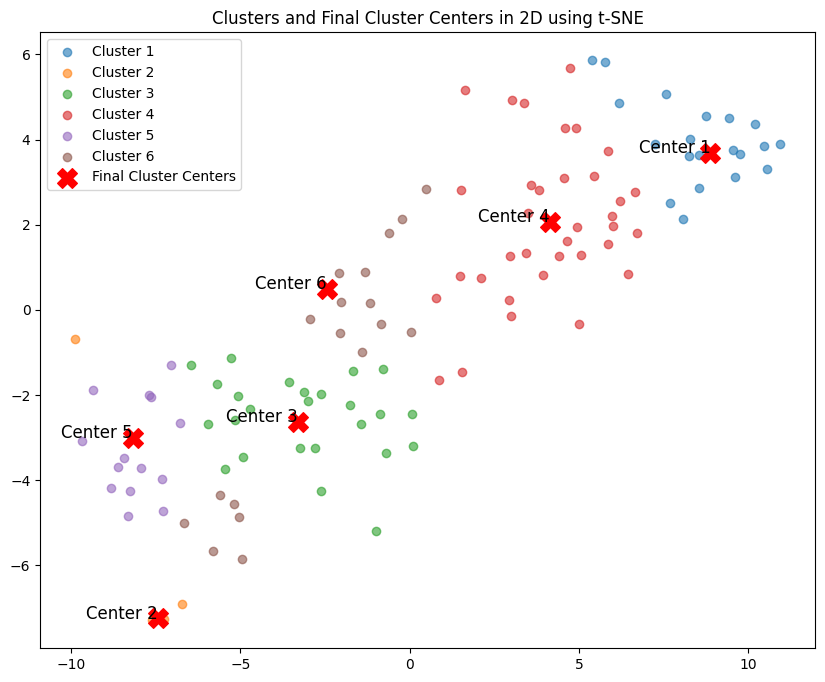

In [76]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'data' is a list of 116 elements, each of shape (20, 1400)
# and 'cluster_centers' is a list of 12 elements (2 for each cluster)

# Flatten data and cluster centers
flattened_data = np.array([point.flatten() for point in all_features_list])  # Shape (116, 28000)
flattened_centers = np.array([center.flatten() for center in all_features_list_scrapped])  # Shape (12, 28000)

# Calculate initial centers by averaging pairs
initial_centers = np.array([np.mean(flattened_centers[i*2:(i*2)+2], axis=0) for i in range(6)])

# Perform K-means clustering
kmeans = KMeans(n_clusters=6, init=initial_centers, n_init=1)  # Using predefined centers
labels = kmeans.fit_predict(flattened_data)
final_centers = kmeans.cluster_centers_  # The final computed cluster centers

# Combine data points and centers for dimensionality reduction
all_points = np.vstack([flattened_data, final_centers])
all_labels = np.concatenate([labels, np.array([6] * 6)])  # Label final centers distinctly

# Reduce dimensions with PCA, followed by t-SNE for better separation
pca = PCA(n_components=50).fit_transform(all_points)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_points = tsne.fit_transform(pca)

# Split transformed points into data and final cluster centers
data_points_tsne = tsne_points[:116]
centers_tsne = tsne_points[116:]

# Plotting the clusters and final cluster centers with labels
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.scatter(data_points_tsne[labels == i, 0], data_points_tsne[labels == i, 1], label=f'Cluster {i + 1}', alpha=0.6)
plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], c='red', marker='X', s=200, label='Final Cluster Centers')

# Add annotations for each final cluster center
for idx, (x, y) in enumerate(centers_tsne):
    plt.text(x, y, f'Center {idx + 1}', fontsize=12, ha='right', color='black')

plt.title("Clusters and Final Cluster Centers in 2D using t-SNE")
plt.legend()
plt.show()


In [77]:
data = np.array(all_features_list)
cluster_centers = np.array(all_features_list_scrapped)

# Initialize an array to store the distances
dist_matrix = np.zeros((data.shape[0], cluster_centers.shape[0]))

# Calculate Euclidean distances
for i in range(data.shape[0]):
    for j in range(cluster_centers.shape[0]):
        dist_matrix[i, j] = np.linalg.norm(data[i] - cluster_centers[j])

# Determine the closest cluster pair for each data point
# Since we have pairs, average pairs of centers to get 6 clusters
labels = []
for i in range(dist_matrix.shape[0]):
    # Find the closest center index
    closest_center = np.argmin(dist_matrix[i])
    
    # Map closest center to one of 6 clusters (0-5) by integer division
    cluster_label = closest_center // 2
    labels.append(cluster_label)

# Convert labels to a numpy array for easy handling
labels = np.array(labels)

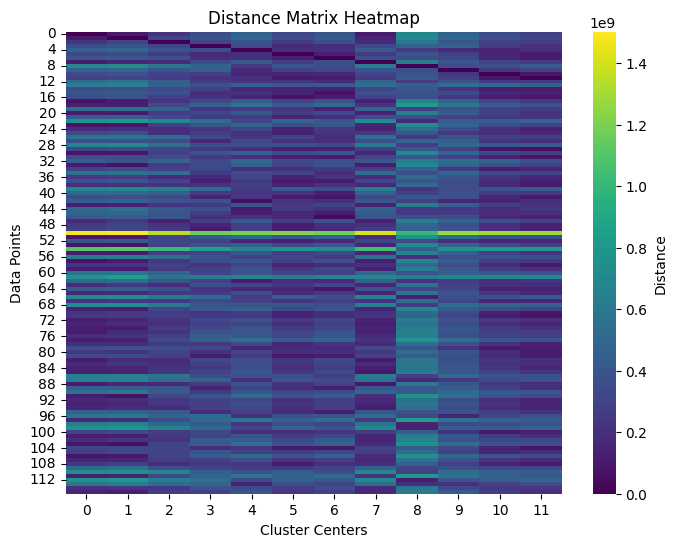

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming 'data' is an array of shape (116, 20, 1400)
# and 'cluster_centers' is an array of shape (12, 20, 1400)

# Reshape data for Euclidean distance calculations
data = np.array(all_features_list)
cluster_centers = np.array(all_features_list_scrapped)

# Initialize an array to store the distances
dist_matrix = np.zeros((data.shape[0], cluster_centers.shape[0]))

# Calculate Euclidean distances
for i in range(data.shape[0]):
    for j in range(cluster_centers.shape[0]):
        dist_matrix[i, j] = np.linalg.norm(data[i] - cluster_centers[j])

# Determine the closest cluster pair for each data point
# Since we have pairs, average pairs of centers to get 6 clusters
labels = []
for i in range(dist_matrix.shape[0]):
    # Find the closest center index
    closest_center = np.argmin(dist_matrix[i])
    
    # Map closest center to one of 6 clusters (0-5) by integer division
    cluster_label = closest_center // 2
    labels.append(cluster_label)

# Convert labels to a numpy array for easy handling
labels = np.array(labels)

# Plotting the distance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dist_matrix, cmap="viridis", annot=False, fmt=".2f", cbar_kws={'label': 'Distance'})
plt.title("Distance Matrix Heatmap")
plt.xlabel("Cluster Centers")
plt.ylabel("Data Points")
plt.show()


In [80]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 29, 1: 8, 2: 16, 3: 26, 4: 16, 5: 21}

In [81]:
dir_files

['01-MFCC.csv',
 '02-MFCC.csv',
 '03-MFCC.csv',
 '04-MFCC.csv',
 '05-MFCC.csv',
 '06-MFCC.csv',
 '07-MFCC.csv',
 '08-MFCC.csv',
 '09-MFCC.csv',
 '10-MFCC.csv',
 '100-MFCC.csv',
 '101-MFCC.csv',
 '102-MFCC.csv',
 '103-MFCC.csv',
 '104-MFCC.csv',
 '105-MFCC.csv',
 '106-MFCC.csv',
 '107-MFCC.csv',
 '108-MFCC.csv',
 '109-MFCC.csv',
 '11-MFCC.csv',
 '110-MFCC.csv',
 '111-MFCC.csv',
 '112-MFCC.csv',
 '113-MFCC.csv',
 '114-MFCC.csv',
 '115-MFCC.csv',
 '116-MFCC.csv',
 '12-MFCC.csv',
 '13-MFCC.csv',
 '14-MFCC.csv',
 '15-MFCC.csv',
 '16-MFCC.csv',
 '17-MFCC.csv',
 '18-MFCC.csv',
 '19-MFCC.csv',
 '20-MFCC.csv',
 '21-MFCC.csv',
 '22-MFCC.csv',
 '23-MFCC.csv',
 '24-MFCC.csv',
 '25-MFCC.csv',
 '26-MFCC.csv',
 '27-MFCC.csv',
 '28-MFCC.csv',
 '29-MFCC.csv',
 '30-MFCC.csv',
 '31-MFCC.csv',
 '32-MFCC.csv',
 '33-MFCC.csv',
 '34-MFCC.csv',
 '35-MFCC.csv',
 '36-MFCC.csv',
 '37-MFCC.csv',
 '38-MFCC.csv',
 '39-MFCC.csv',
 '40-MFCC.csv',
 '41-MFCC.csv',
 '42-MFCC.csv',
 '43-MFCC.csv',
 '44-MFCC.csv',
 '45-MF

In [82]:
dir_files_scrapped

['1audio.csv',
 '2audio.csv',
 '3audio.csv',
 '4audio.csv',
 '5audio.csv',
 '6audio.csv',
 '7audio.csv',
 '8audio.csv',
 '90audio.csv',
 '91audio.csv',
 '92audio.csv',
 '93audio.csv']

In [83]:
labels

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 3, 1, 5, 3, 2, 0, 0, 3, 0, 2,
       4, 0, 5, 2, 3, 1, 4, 5, 0, 5, 1, 0, 5, 3, 2, 2, 5, 4, 3, 3, 2, 0,
       2, 2, 3, 3, 2, 1, 4, 0, 2, 0, 4, 0, 4, 0, 5, 0, 3, 1, 2, 3, 3, 5,
       4, 5, 4, 0, 5, 5, 0, 3, 0, 0, 3, 0, 5, 5, 5, 2, 3, 0, 3, 3, 3, 4,
       3, 3, 1, 0, 5, 0, 3, 3, 4, 0, 4, 4, 5, 0, 3, 0, 5, 5, 0, 0, 5, 2,
       4, 0, 4, 2, 3, 0], dtype=int64)

In [86]:
labels = labels+1

In [87]:
labels

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 4, 2, 6, 4, 3, 1, 1, 4, 1, 3,
       5, 1, 6, 3, 4, 2, 5, 6, 1, 6, 2, 1, 6, 4, 3, 3, 6, 5, 4, 4, 3, 1,
       3, 3, 4, 4, 3, 2, 5, 1, 3, 1, 5, 1, 5, 1, 6, 1, 4, 2, 3, 4, 4, 6,
       5, 6, 5, 1, 6, 6, 1, 4, 1, 1, 4, 1, 6, 6, 6, 3, 4, 1, 4, 4, 4, 5,
       4, 4, 2, 1, 6, 1, 4, 4, 5, 1, 5, 5, 6, 1, 4, 1, 6, 6, 1, 1, 6, 3,
       5, 1, 5, 3, 4, 1], dtype=int64)

In [ ]:
data = {'Filename': dir_files, 'Label': labels}

# Step 2: Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Step 3: Save the DataFrame to a CSV file
df.to_csv('labeled_data.csv', index=True)

In [89]:
import numpy as np

# Assuming 'data' is an array of shape (116, 20, 1400) for the 116 data points
# and 'class_centers' is an array of shape (12, 20, 1400) for the 12 class center points

# Function to compute Euclidean distance
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Initialize a dictionary to store the closest points for each class
closest_points = {i: [] for i in range(6)}  # 6 classes

# Convert data and class_centers to numpy arrays for easier manipulation
data = np.array(all_features_list)  # Shape (116, 20, 1400)
class_centers = np.array(all_features_list_scrapped)  # Shape (12, 20, 1400)

# For each data point, calculate the distance to each class center
for i in range(data.shape[0]):  # 116 data points
    distances = []
    
    # Calculate distance to each of the 12 class centers
    for j in range(class_centers.shape[0]):  # 12 class centers
        dist = euclidean_distance(data[i], class_centers[j])
        distances.append(dist)
    
    # Get the index of the 2 closest cluster centers
    closest_center_indices = np.argsort(distances)[:2]  # The two closest centers
    
    # Assign the data point to the closest class (0-5)
    for idx in closest_center_indices:
        class_label = idx // 2  # 2 centers per class
        closest_points[class_label].append((i, distances[idx]))

# Now, for each class, sort the points by distance and take the top 3 closest
final_closest_points = {key: [] for key in closest_points.keys()}
for key in closest_points:
    # Sort the list of tuples (data_index, distance) by distance and take the 3 closest
    closest_points[key] = sorted(closest_points[key], key=lambda x: x[1])[:3]
    final_closest_points[key] = [x[0] for x in closest_points[key]]  # Just get the indices of the closest points

# Output the final closest points for each class
final_closest_points


{0: [0, 1, 103],
 1: [2, 3, 49],
 2: [4, 5, 42],
 3: [6, 7, 46],
 4: [8, 9, 112],
 5: [10, 11, 29]}